<h1>EDA, Análisis Profundo de datos<h1>  

<h3>Objetivo</h3>
El objetivo de este notebook es Explorar los datos de los que disponemos de una forma más profunda. Para esto nos enfocamos en analizar los outliers y las relaciones entre estos datos


<h3>Importación de Librerías</h3>
Importaremos pandas, matplotlib y seaborn para realizar este analisis más profundo de loa datos  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Carga de dataset</h3>
Cargamos el dataset en 2 dataframes, uno con victimas y otro con hechos

In [3]:
dfVictimas=pd.read_excel("../Dataset_Original/homicidios.xlsx", sheet_name="VICTIMAS")
dfHechos=pd.read_excel("../Dataset_Original/homicidios.xlsx", sheet_name="HECHOS")

<h3>Analisis de relacion estre datos </h3>
Con esto vemos como se relacionan las variables numéricas

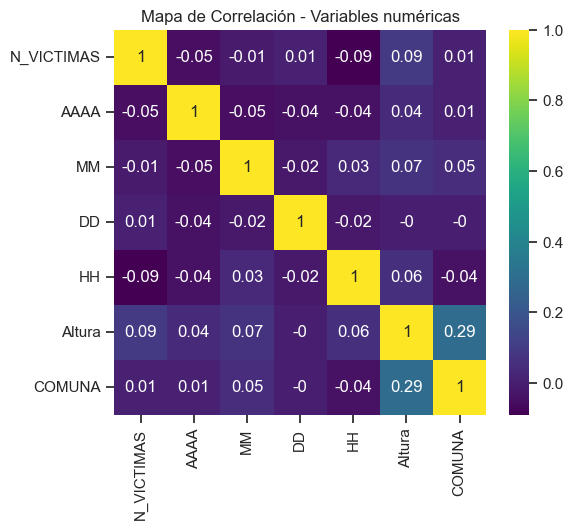

In [18]:
dataNumerica = dfHechos.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Podemos ver a travez del gráfico que no existe una relacion directa entre varibles númericas

<h3>Explorar Relaciones entre Variables con Scatter Plots</h3>
Para ver cómo se relacionan las variables de mes y hora con el número de víctimas, podemos hacer un scatter plot.

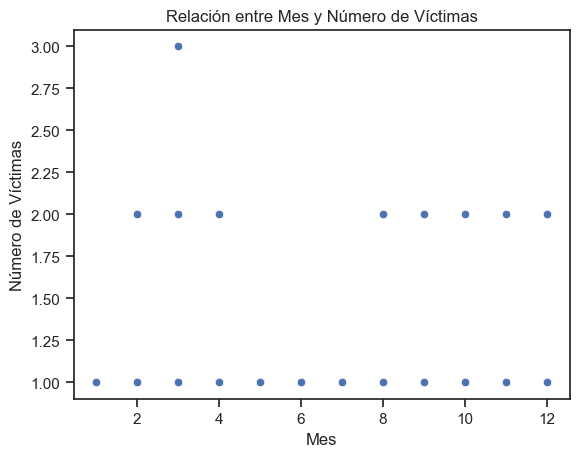

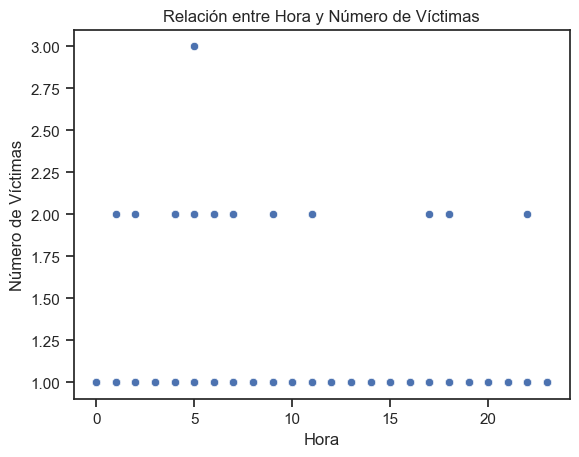

In [14]:
# Scatter plot para Mes vs Número de Víctimas
sns.scatterplot(x=dfHechos['MM'], y=dfHechos['N_VICTIMAS'])
plt.title('Relación entre Mes y Número de Víctimas')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.show()

# Scatter plot para Hora vs Número de Víctimas
# Asegúrate de que la columna 'HH' esté en un formato que pueda ser interpretado como numérico
dfHechos['HH'] = pd.to_numeric(dfHechos['HH'], errors='coerce') # Convierte la columna a numérico, 'coerce' transforma los no convertibles en NaN
sns.scatterplot(x=dfHechos['HH'], y=dfHechos['N_VICTIMAS'])
plt.title('Relación entre Hora y Número de Víctimas')
plt.xlabel('Hora')
plt.ylabel('Número de Víctimas')
plt.show()


Con eel primer gráfico podemos notar como a principio y l final del año la cantidad de victimas por hecho son suele ser mayor (sobre todo al comienzo), mientras que en la mitad del año suele ser baja

<h3>Identificar Outliers con IQR (Rango Intercuartílico)</h3>
Con esto identificamos algunas filas de outliers del dataset

In [17]:
# Calculamos el IQR
Q1 = dfHechos['N_VICTIMAS'].quantile(0.25)
Q3 = dfHechos['N_VICTIMAS'].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos outliers
outliers = dfHechos[(dfHechos['N_VICTIMAS'] < lower_bound) | (dfHechos['N_VICTIMAS'] > upper_bound)]
outliers

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11.0,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS
97,2016-0126,2,2016-09-18,2016,9,18,22:45:00,22.0,IRIGOYEN Y TINOGASTA,CALLE,...,NaN,TINOGASTA,IRIGOYEN y TINOGASTA,10,Point (94275.54271123 100886.87954649),-58.52572109,-34.62125906,AUTO-CARGAS,AUTO,CARGAS
161,2017-0026,2,2017-02-26,2017,2,26,05:15:00,5.0,AV. PERITO MORENO Y FOURNIER,AVENIDA,...,NaN,FOURNIER,"MORENO, PERITO AV. y FOURNIER",4,Point (104113.67806500 97722.68219304),-58.41842777,-34.64979057,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
170,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5.0,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
171,2017-0036,2,2017-03-29,2017,3,29,18:00:00,18.0,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,...,NaN,CAMPANA,"PAZ, GRAL. AV. y CAMPANA",12,Point (95300.18060161 105287.23850698),-58.51452347,-34.58159762,MOTO-PASAJEROS,MOTO,PASAJEROS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4.0,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,...,NaN,MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
234,2017-0112,2,2017-09-10,2017,9,10,09:32:17,9.0,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
244,2017-0126,2,2017-10-14,2017,10,14,06:15:00,6.0,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,...,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
267,2017-0153,2,2017-12-11,2017,12,11,02:00:00,2.0,ROSARIO Y AV. LA PLATA,AVENIDA,...,NaN,LA PLATA AV.,ROSARIO y LA PLATA AV.,6,Point (103186.65733155 101217.09689755),-58.42855267,-34.61829385,MOTO-PASAJEROS,MOTO,PASAJEROS


Con esto encontramos algunas filas que presentan algunos outliers, pero nada alarmante ni en lo que tengamos que detenernos mucho

<h3>Boxplots para Identificación de Outliers</h3>
Generamos un conjunto de boxplots para las columnas numéricas del DataFrame de victimas y los presentamos en una cuadrícula de 2x2 en una figura. Cada boxplot representa la distribución de los datos para una columna numérica específica.

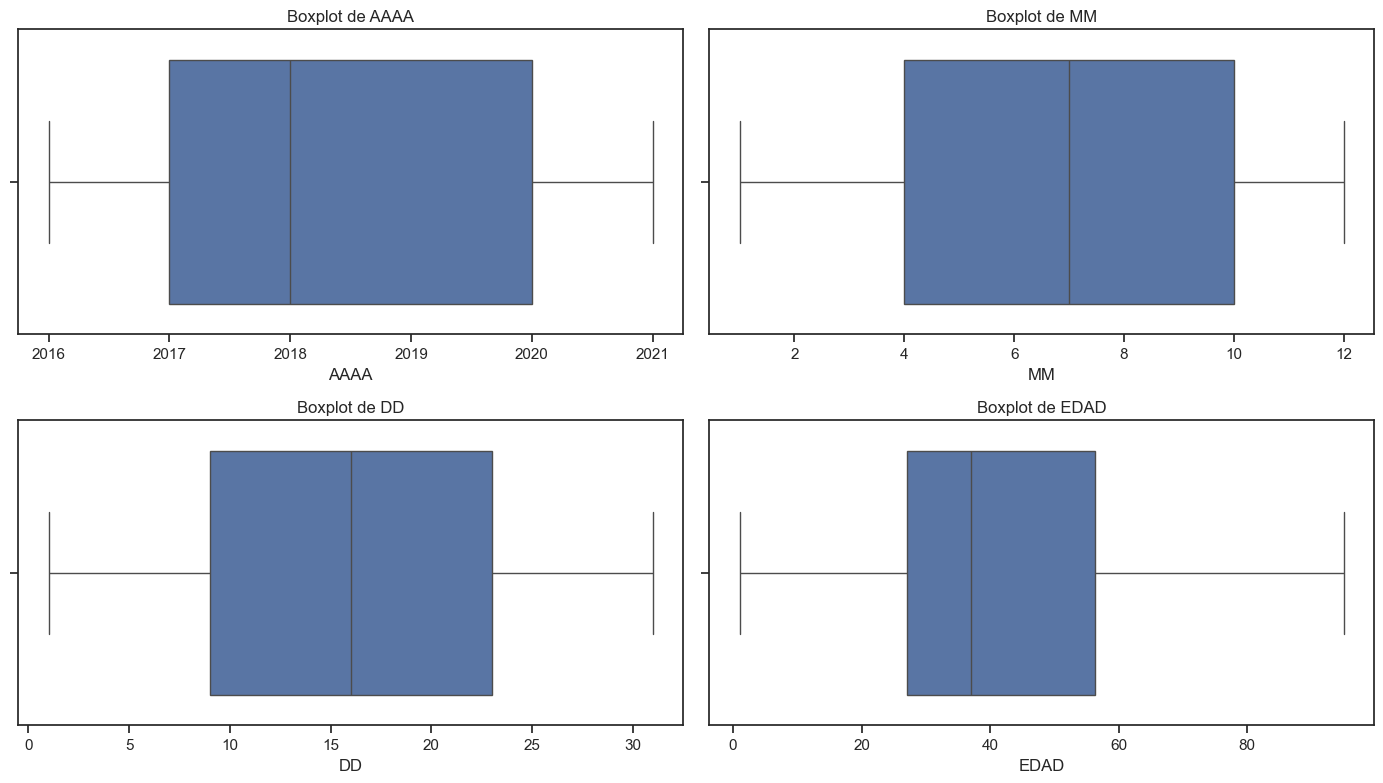

In [12]:
numerical_columns = dfVictimas.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=dfVictimas[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()


Con este gráfico entendemos que no existen outliers notables cuando hablamos de la Edad de las victimas o otras variables numéricas